In [1]:
%matplotlib inline

import numpy as np
from src.kalman_filter import KF

import matplotlib.pyplot as plt
import seaborn as sns 

from ipywidgets import interact, interactive, IntSlider, FloatSlider, fixed

# Simulation

In [2]:
def initialize_filter(x0, x0_v, dx0, dx0_v, dt, a, a_v, z_v):
    n, m, k = 2, 1, 1
    kf = KF(n, m, k)
    
    x = np.array([[x0, dx0]]).T
    f = np.array([[1, dt], [0, 1]])
    u = np.array([[a]]).T
    b = np.array([[(dt**2)/2.0, dt]]).T
    p = np.array([[x0_v, 0], [0, dx0_v]])
    q = np.array([[(dt**4)/4, (dt**3)/2], [(dt**3)/2, dt**2]]) * a_v
    h = np.array([[1, 0]])
    r = np.array([[z_v]])
    
    kf.initialize(_x=x, _F=f, _u=u, _B=b, _P=p, _Q=q, _H=h, _R=r)
    
    return kf

In [3]:
def propagate_in_time(x0, x0_v, dx0, dx0_v, dt, a, a_v, to):
    error = lambda var: np.random.randn() * np.sqrt(var)
    
    x0 = x0 + error(x0_v)
    pos, x, dx = [x0], x0, dx0 + error(dx0_v)
    
    for _ in range(to):
        x += dx * dt
        dx += (a + error(a_v)) * dt
        pos.append(x)
        
    return np.array(pos)

def make_observations(data, z_v):
    return data + np.random.randn(*data.shape) * np.sqrt(z_v)

In [4]:
def simple_simulation(x0, x0_std, dx0, dx0_std, dt, a, a_std, z_std, to=100):
    x0_v, dx0_v, a_v, z_v = map(lambda e: e**2, [x0_std, dx0_std, a_std, z_std])
    kf = initialize_filter(x0, x0_v, dx0, dx0_v, dt, a, a_v, z_v)
    data = propagate_in_time(x0, x0_v, dx0, dx0_v, dt, a, a_v, to)
    observations = make_observations(data, z_v)
    
    res = []
    for z in observations:
        kf.predict()
        kf.update(z)
        res.append(kf.get_state())
    res = np.array(res)
    
    plt.title('Kalman Filter')
    plt.plot(data, 'b-')
    plt.plot(observations, 'g^')
    plt.plot(res[:, 0], 'r-')
    plt.legend(['actual position', 'observations', 'filter result'])

# Dynamic Visualization

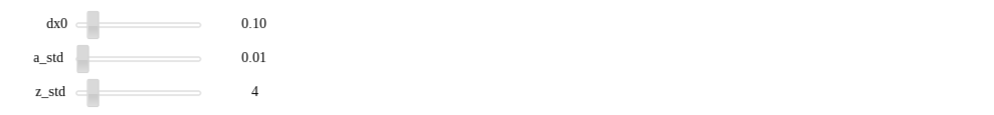

<function __main__.simple_simulation>

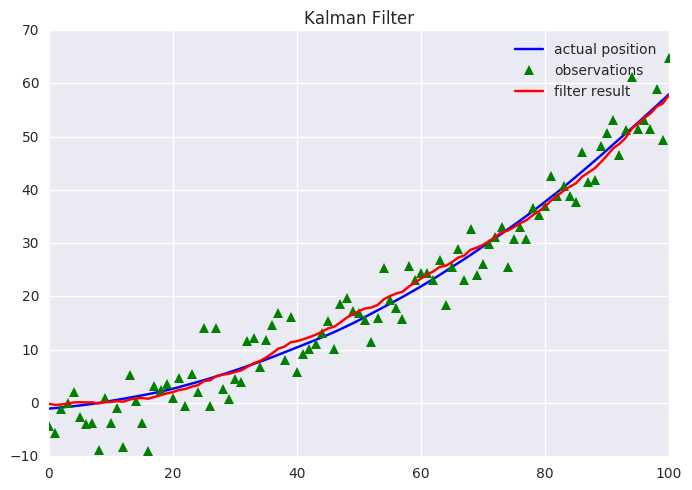

In [5]:
interact(
    simple_simulation,
    x0 = fixed(0), x0_std=fixed(1), dt=fixed(1), to=fixed(100), a=fixed(0.01),
    dx0 = FloatSlider(min=0,max=1,step=0.01,value=0.1), dx0_std=fixed(0.01),
    a_std = FloatSlider(min=0,max=1,step=0.0001,value=0.01),
    z_std = IntSlider(min=0,max=40,step=1,value=4)
)